In [158]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Laptop Price Predictor**
The dataset used in this project is 'laptop_data.csv'. It contains information about various laptops such as brand, screen size, processor, RAM, storage, and price. The dataset has 1300 rows and 11 columns. The dataset required extensive data preprocessing, feature engineering, and one-hot encoding.

In [160]:
df = pd.read_csv('/content/drive/MyDrive/AdvanceTechniquesInDataScience/laptop_data_kaggle.csv')

In [161]:
df.shape

(1303, 12)

In [162]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [163]:
#Check for null values
df.isna().sum()

,0
Unnamed: 0,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0


In [164]:
#Check for duplicated values
df.duplicated().sum()

0

In [165]:
#un-named column is usless to us so we will drop it
df.drop('Unnamed: 0', axis = 'columns', inplace = True)

In [166]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [167]:
#change the 'Ram' column's data into numeric form by remove any additional string
df['Ram'] = df['Ram'].apply(lambda x: x.replace('GB',''))
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [168]:
#change the 'Weight' column's data into numeric form by remove any additional string
df['Weight'] = df['Weight'].apply(lambda x:x.replace('kg',''))
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [169]:
#Now Ram and Weight column are converted to numeric we will change there type tp int and float
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


In [171]:
#We will draw some plots now to Explore our dataset i-e EDA
import seaborn as sns

In [172]:
#lets make the price in round figure as it is in float
df['Price'] = df['Price'].apply(round)

<Axes: xlabel='TypeName'>

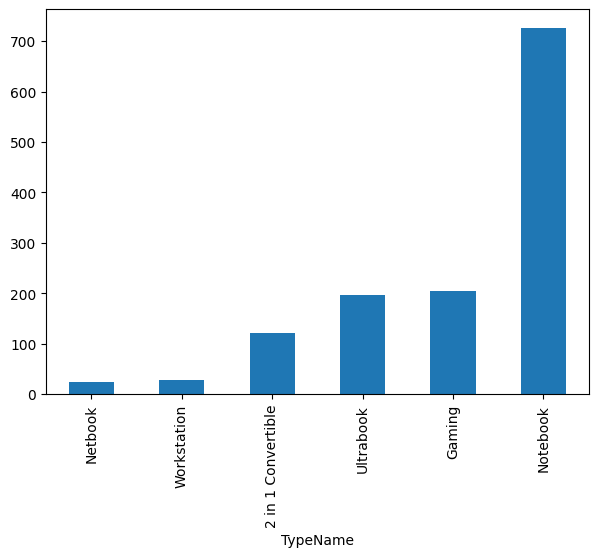

In [173]:
#Lets first check which type of laptops do we have in our data using bar graph
df['TypeName'].value_counts().sort_values(ascending=True).plot(kind='bar',figsize=(7,5))

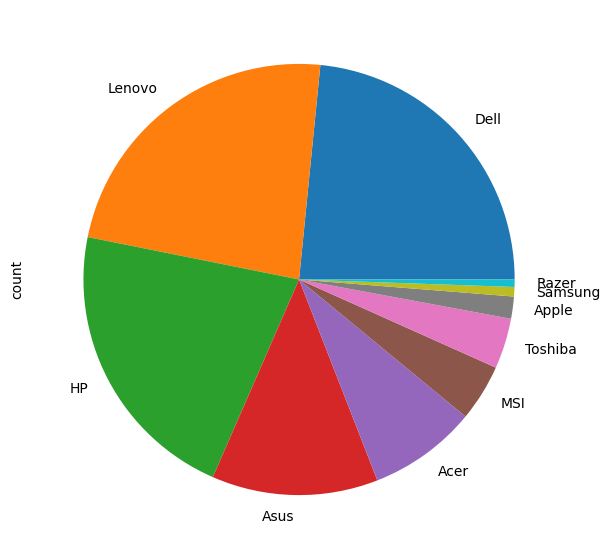

In [174]:
#Lets have a look at top 10 companies
plt.figure(figsize=(10,7))
df['Company'].value_counts().head(10).plot(kind='pie')
plt.show()

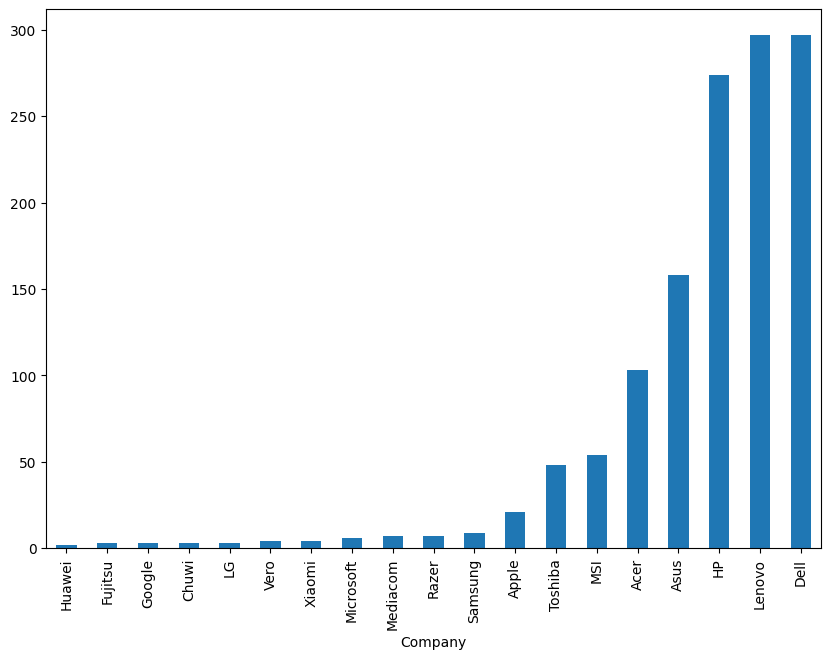

In [175]:
#now lets check the number of laptops by companies using horizotal bar graph
df['Company'].value_counts().sort_values(ascending=True).plot(kind='bar',figsize=(10,7))
plt.show()

<Figure size 1000x700 with 0 Axes>

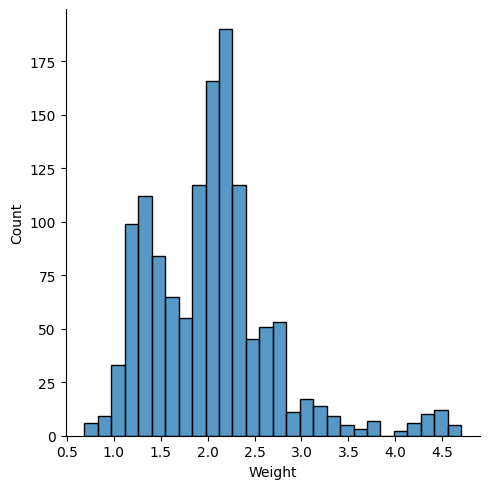

In [176]:
#lets have a look at count of laptops with respect to weight
plt.figure(figsize=(10,7))
sns.displot(df['Weight'])
plt.show()

<Figure size 1000x700 with 0 Axes>

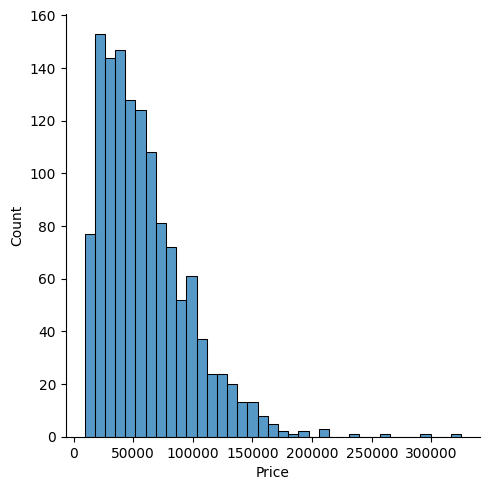

In [177]:
#lets have a look at count of laptops with respect to price
plt.figure(figsize=(10,7))
sns.displot(df['Price'])
plt.show()

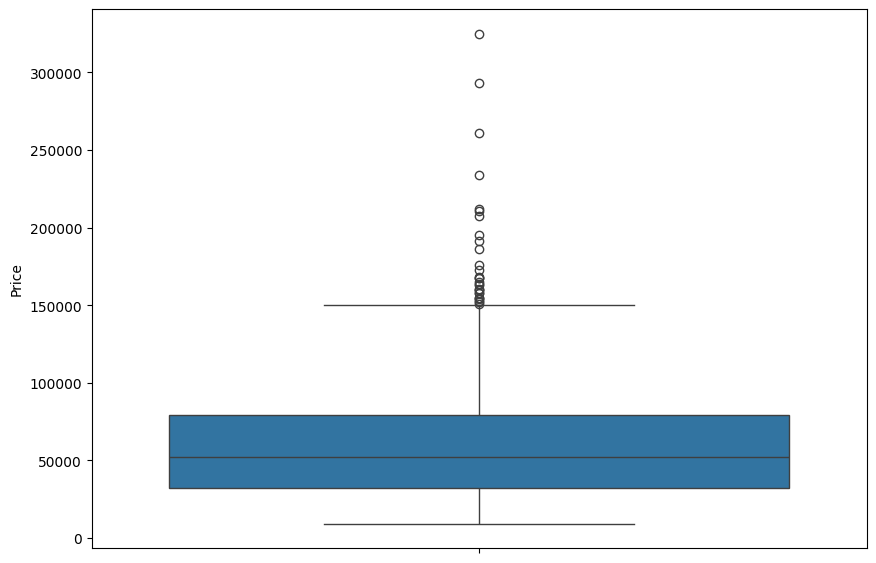

In [179]:
#we see from displot that there are some value that can be outlier's lets use boxplot to have look at them
plt.figure(figsize=(10,7))
sns.boxplot(df['Price'])
plt.show()

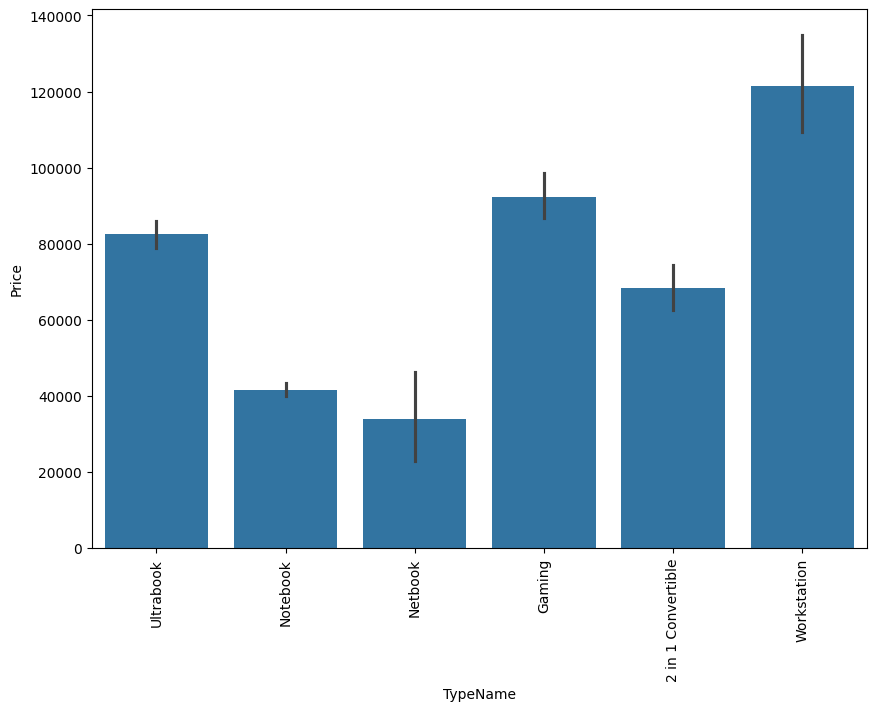

In [180]:
#nwo lets compare prices according to type of laptops
plt.figure(figsize=(10,7))
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

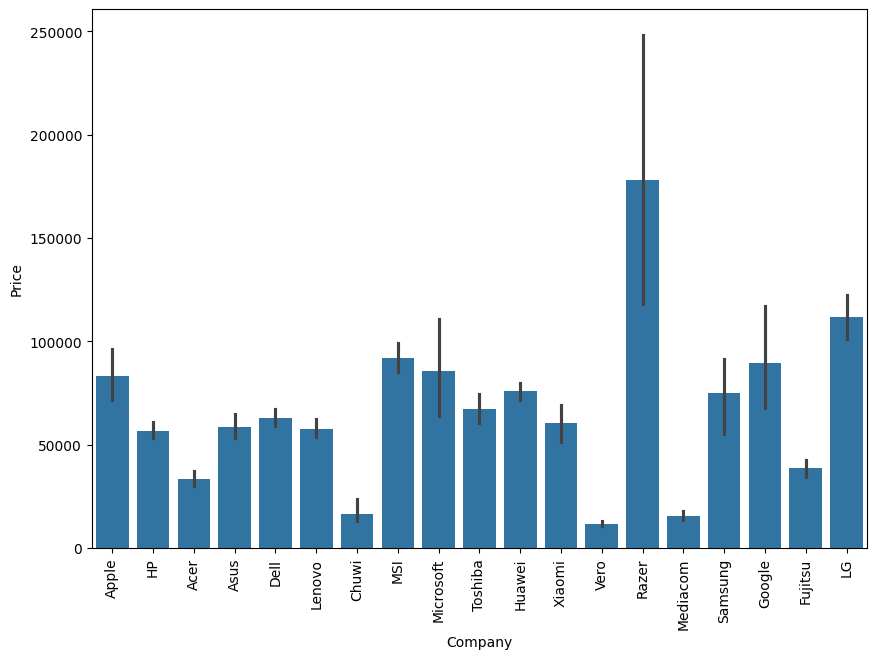

In [181]:
#lets do same thing with company wise prices
plt.figure(figsize=(10,7))
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

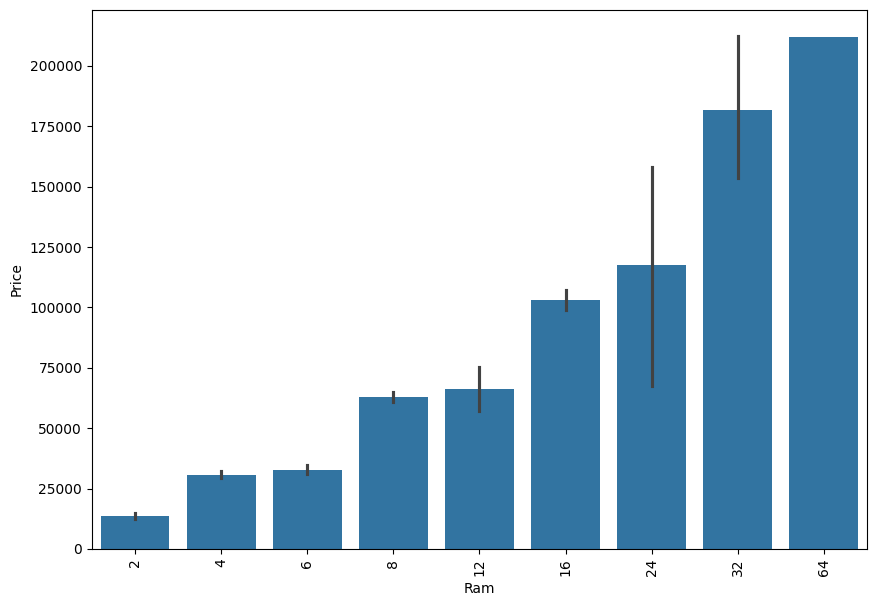

In [182]:
#lets do price check w.r.t Ram
plt.figure(figsize=(10,7))
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

**Feature Engineering**

In [183]:
#i think there seems to be a feature that can play an important role in price that is if a laptop is touchscreen or not, lets generate that column using screen's information
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [184]:
#so now lets count how many are touchscreen or not
df['Touchscreen'].value_counts()

,count
Touchscreen,
0,1111
1,192


In [185]:
#lets have a look screen resolution column as well
for i in df['ScreenResolution'].sample(5):
  print(i)

IPS Panel 1366x768
1366x768
Full HD 1920x1080
Touchscreen 2560x1440
1366x768


In [186]:
#lets explore what other type of screen's we have
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,507
1366x768,281
IPS Panel Full HD 1920x1080,230
IPS Panel Full HD / Touchscreen 1920x1080,53
Full HD / Touchscreen 1920x1080,47
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


In [187]:
#i see in above result that there are alot of IPS panels, lets get them in a separate column
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [188]:
#lets see how many ips units we have
df['IPS'].value_counts()

,count
IPS,
0,938
1,365


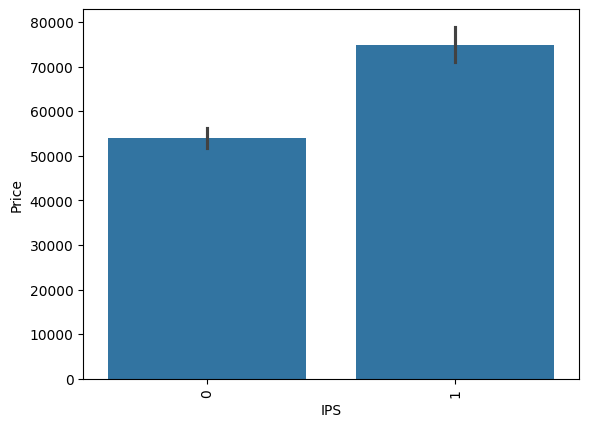

In [189]:
#lets lets prices wrt ips
sns.barplot(x=df['IPS'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [190]:
#lets extract some more infomration from screen resolution like its resolutions and store them in new columns
temp = df['ScreenResolution'].str.split('x',n=1,expand = True)
df['Xres'] =temp[0]
df['Yres'] = temp[1]
df.head(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Xres,Yres
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71379,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47896,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96096,0,1,IPS Panel Retina Display 2560,1600
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,21312,0,0,1366,768
6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,114018,0,1,IPS Panel Retina Display 2880,1800
7,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,61736,0,0,1440,900
8,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Nvidia GeForce MX150,Windows 10,1.30,79654,0,0,Full HD 1920,1080
9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,41026,0,1,IPS Panel Full HD 1920,1080


In [191]:
#we see Xres has some unwanted data to lets filter it a bit
df['Xres']=df['Xres'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Xres,Yres
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71379,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47896,0,0,1440,900


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   int64  
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  Xres              1303 non-null   object 
 14  Yres              1303 non-null   object 
dtypes: float32(1), float64(1), int32(1), int64(3), object(9)
memory usage: 142.6+ KB


In [193]:
#i think Xres and Yres should be int type not object
df['Xres'] =df['Xres'].astype('int')
df['Yres']= df['Yres'].astype('int')

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   int64  
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  Xres              1303 non-null   int64  
 14  Yres              1303 non-null   int64  
dtypes: float32(1), float64(1), int32(1), int64(5), object(7)
memory usage: 142.6+ KB


In [195]:
#lets use Xres and Yres now to calculate pixels per inch and create new column
df['PPI'] = (((df['Xres']**2)+(df['Yres']**2))**0.5/df['Inches']).astype('float')

In [196]:
#lets check CPU's now
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,190
Intel Core i7 7700HQ 2.8GHz,146
Intel Core i7 7500U 2.7GHz,134
Intel Core i7 8550U 1.8GHz,73
Intel Core i5 8250U 1.6GHz,72
...,...
Intel Core M M3-6Y30 0.9GHz,1
AMD A9-Series 9420 2.9GHz,1
Intel Core i3 6006U 2.2GHz,1


In [197]:
#Lets first separate CPU names from this data
df['Cpu name']=df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Xres,Yres,PPI,Cpu name
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71379,0,1,2560,1600,226.983005,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47896,0,0,1440,900,127.677940,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,1920,1080,141.211998,Intel Core i5


In [198]:
#lets fetch processor brand from the cpu data as well
def fetch(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other intel processor'
        else:
            return 'AMD Processor'

df['Processor brand'] = df['Cpu name'].apply(fetch)
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Xres,Yres,PPI,Cpu name,Processor brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71379,0,1,2560,1600,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47896,0,0,1440,900,127.677940,Intel Core i5,Intel Core i5


In [199]:
df.sample(4)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Xres,Yres,PPI,Cpu name,Processor brand
550,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,2.20,26587,0,0,1920,1080,141.211998,Intel Core i3,Intel Core i3
470,HP,2 in 1 Convertible,13.3,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 8550U 1.8GHz,8,512GB SSD,Intel UHD Graphics 620,Windows 10,1.29,106507,1,1,3840,2160,331.264236,Intel Core i7,Intel Core i7
567,Fujitsu,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Intel HD Graphics 620,Windows 10,2.20,39374,0,0,1366,768,100.454670,Intel Core i5,Intel Core i5
109,Lenovo,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.58,78854,0,1,1920,1080,157.350512,Intel Core i7,Intel Core i7


In [200]:
#lets deal with Memory now
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

In [201]:
#here we are separating out numerical values and creating a meaningful information
df["first"]= new[0]
df["first"]=df["first"].str.strip()

In [202]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Xres,Yres,PPI,Cpu name,Processor brand,first
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71379,0,1,2560,1600,226.983005,Intel Core i5,Intel Core i5,128 SSD
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47896,0,0,1440,900,127.677940,Intel Core i5,Intel Core i5,128 Flash Storage
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,1920,1080,141.211998,Intel Core i5,Intel Core i5,256 SSD
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,2880,1800,220.534624,Intel Core i7,Intel Core i7,512 SSD
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96096,0,1,2560,1600,226.983005,Intel Core i5,Intel Core i5,256 SSD


In [203]:
df["second"]= new[1]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,Xres,Yres,PPI,Cpu name,Processor brand,first,second
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71379,0,1,2560,1600,226.983005,Intel Core i5,Intel Core i5,128 SSD,None
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47896,0,0,1440,900,127.677940,Intel Core i5,Intel Core i5,128 Flash Storage,None
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,1920,1080,141.211998,Intel Core i5,Intel Core i5,256 SSD,None
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,2880,1800,220.534624,Intel Core i7,Intel Core i7,512 SSD,None
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96096,0,1,2560,1600,226.983005,Intel Core i5,Intel Core i5,256 SSD,None


In [204]:
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [205]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,Yres,PPI,Cpu name,Processor brand,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,...,1600,226.983005,Intel Core i5,Intel Core i5,128 SSD,None,0,1,0,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,900,127.677940,Intel Core i5,Intel Core i5,128 Flash Storage,None,0,0,0,1
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,...,1080,141.211998,Intel Core i5,Intel Core i5,256 SSD,None,0,1,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,...,1800,220.534624,Intel Core i7,Intel Core i7,512 SSD,None,0,1,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,...,1600,226.983005,Intel Core i5,Intel Core i5,256 SSD,None,0,1,0,0


In [206]:
#lets remove none digit character from first column
df['first'] = df['first'].str.replace(r'\D', '', regex=True)

In [207]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,Yres,PPI,Cpu name,Processor brand,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,...,1600,226.983005,Intel Core i5,Intel Core i5,128,None,0,1,0,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,900,127.677940,Intel Core i5,Intel Core i5,128,None,0,0,0,1
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,...,1080,141.211998,Intel Core i5,Intel Core i5,256,None,0,1,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,...,1800,220.534624,Intel Core i7,Intel Core i7,512,None,0,1,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,...,1600,226.983005,Intel Core i5,Intel Core i5,256,None,0,1,0,0


In [208]:
df["second"].fillna("0", inplace = True)

<ipython-input-208-73c89a876e03>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["second"].fillna("0", inplace = True)


In [209]:
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)
df['second'] = df['second'].str.replace(r'\D', '',regex = True)

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

In [210]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,...,0,0,0,0,0,0,0,128,0,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,0,1,0,0,0,0,0,0,0,128
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,...,0,0,0,0,0,0,0,256,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,...,0,0,0,0,0,0,0,512,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,...,0,0,0,0,0,0,0,256,0,0


In [211]:
#lets check correlation between price and other columns
df[['Inches','Ram','Weight','Price','Touchscreen','IPS','Xres','Yres','PPI','HDD','SSD','Hybrid','Flash_Storage']].corr()['Price']

,Price
Inches,0.068196
Ram,0.743007
Weight,0.210370
Price,1.000000
Touchscreen,0.191227
IPS,0.252208
Xres,0.556530
Yres,0.552809
PPI,0.473488
HDD,-0.096441


In [212]:
#So now i guess we have already extract useful infomration lets drop some un important columns
df.drop(columns=['ScreenResolution','Xres','Yres','Inches','Cpu name','Cpu','first','second','Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1Flash_Storage','Layer2SSD','Layer2HDD','Layer2Hybrid','Layer2Flash_Storage'],inplace = True, axis = 'columns')

In [213]:
df.head(3)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Processor brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71379,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47896,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.211998,Intel Core i5,0,256,0,0


In [214]:
#i think memory column is also useless now i should also drop it
df.drop(columns=['Memory'],inplace=True)

In [215]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Processor brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71379,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47896,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96096,0,1,226.983005,Intel Core i5,0,256,0,0


In [217]:
#lets see if we can drop some more columns
df[['Ram','Weight','Price','Touchscreen','IPS','PPI','HDD','SSD','Hybrid','Flash_Storage']].corr()['Price']

,Price
Ram,0.743007
Weight,0.210370
Price,1.000000
Touchscreen,0.191227
IPS,0.252208
PPI,0.473488
HDD,-0.096441
SSD,0.670799
Hybrid,0.007989
Flash_Storage,-0.040511


In [218]:
#lets from Hybrid and Flash storage as well as they do not look so important to me now
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)
df.head(2)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Processor brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71379,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47896,0,0,127.677940,Intel Core i5,0,0


In [219]:
#now lets handle GPU as it is an important part in price
df['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,281
Intel HD Graphics 520,185
Intel UHD Graphics 620,68
Nvidia GeForce GTX 1050,66
Nvidia GeForce GTX 1060,48
...,...
AMD Radeon R5 520,1
AMD Radeon R7,1
Intel HD Graphics 540,1


In [221]:
#separate gpu brand
df['Gpu Brand'] = df['Gpu'].apply(lambda x:x.split()[0])
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Processor brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71379,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47896,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96096,0,1,226.983005,Intel Core i5,0,256,Intel


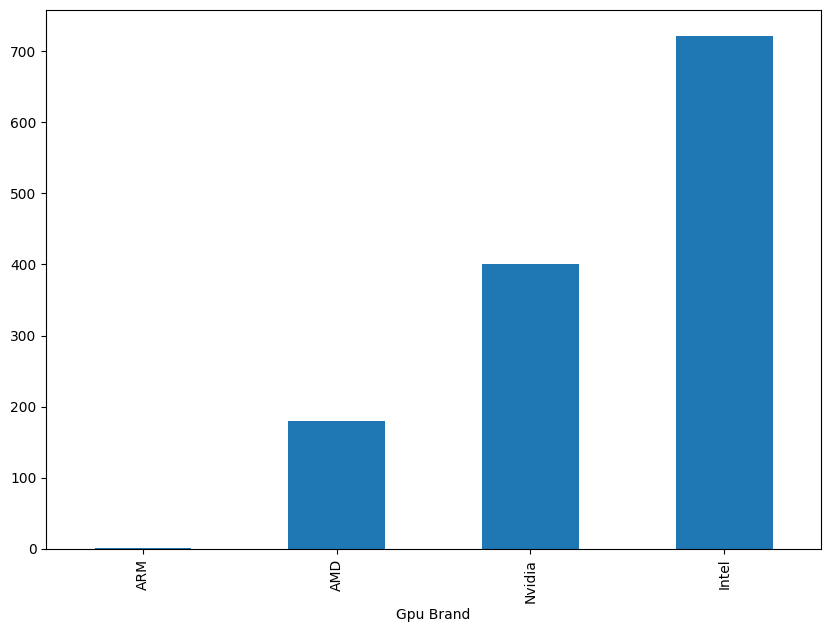

In [222]:
#lets see count of GPU wrt to brands
df['Gpu Brand'].value_counts().sort_values(ascending=True).plot(kind='bar',figsize=(10,7))
plt.show()

In [223]:
#i think ARM is almost none or i haven't heard its name
df = df[df['Gpu Brand'] != 'ARM']

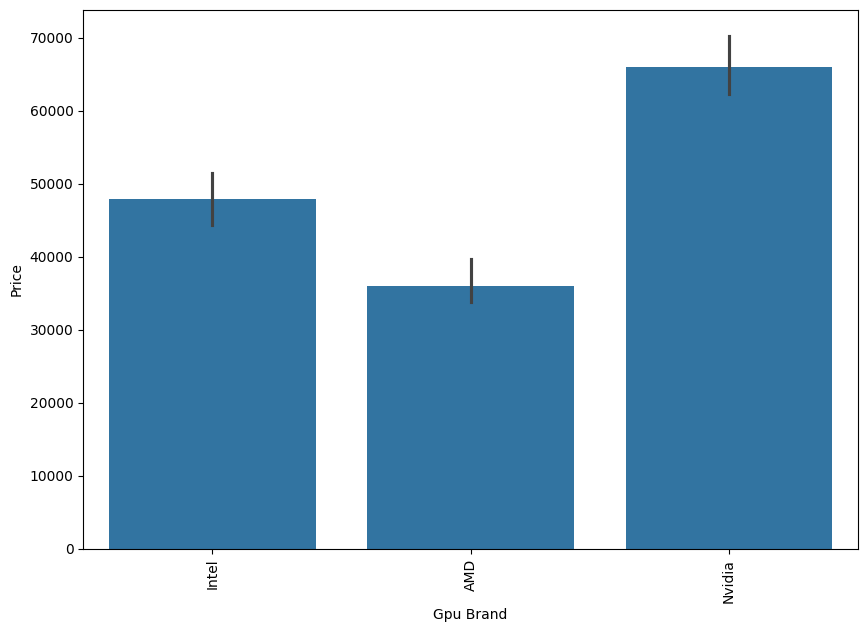

In [225]:
#lets see now price wrt GPU brands
plt.figure(figsize=(10,7))
sns.barplot(x=df['Gpu Brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [226]:
#so now we have GPU brand we can remove GPU column
df.drop(columns=['Gpu'],inplace = True)
df.head()

<ipython-input-226-ae66e9d1536c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Gpu'],inplace = True)


,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,Processor brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,macOS,1.37,71379,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47896,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96096,0,1,226.983005,Intel Core i5,0,256,Intel


In [227]:
#lets move to OS now
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,1072
No OS,66
Linux,62
Windows 7,45
Chrome OS,26
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


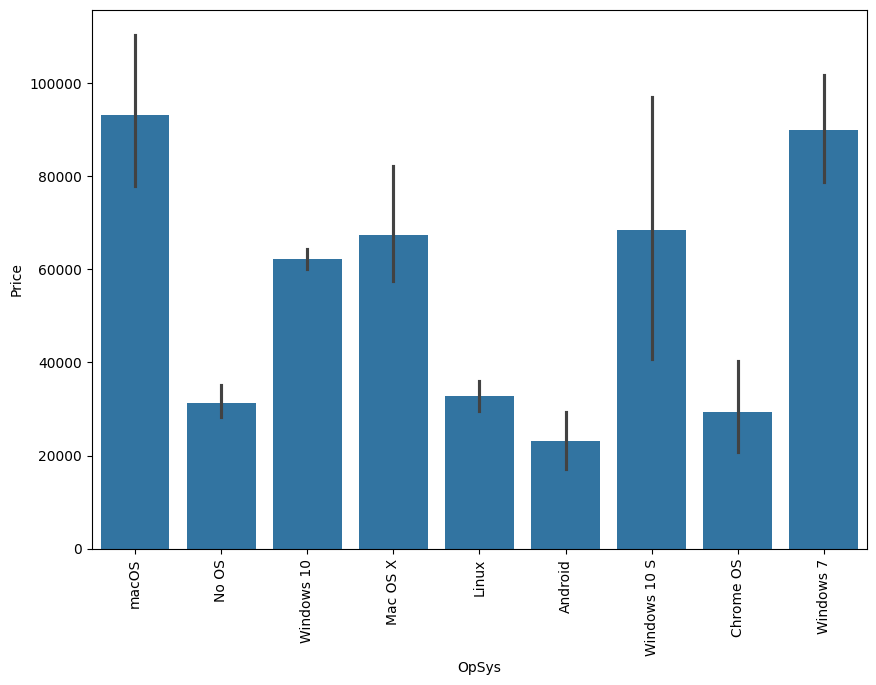

In [229]:
#lets see price wrt to OS
plt.figure(figsize=(10,7))
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [231]:
#it is a good idea if we catagorize the OS in Windows Mac or any other windows os
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [232]:
#its a good idea to create a new column OS
df['OS'] = df['OpSys'].apply(cat_os)

<ipython-input-232-8e21d9e041d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OS'] = df['OpSys'].apply(cat_os)


In [233]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,Processor brand,HDD,SSD,Gpu Brand,OS
0,Apple,Ultrabook,8,macOS,1.37,71379,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47896,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96096,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [234]:
#now we can drop OpSys
df.drop(columns=['OpSys'],inplace = True)

<ipython-input-234-9b149a13218f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['OpSys'],inplace = True)


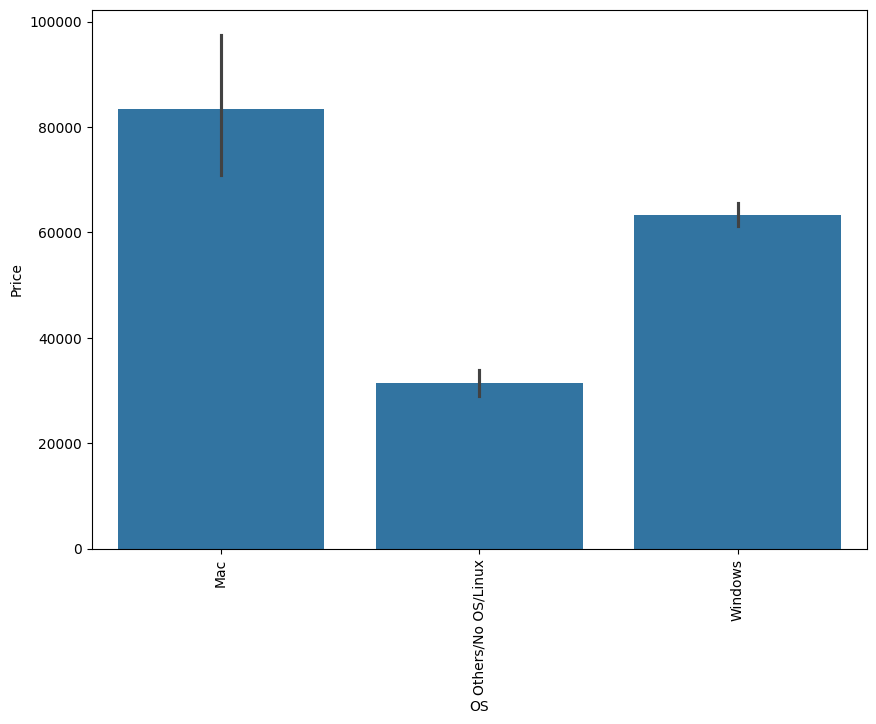

In [237]:
#lets have a look at price wrt OS now
plt.figure(figsize=(10,7))
sns.barplot(x=df['OS'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

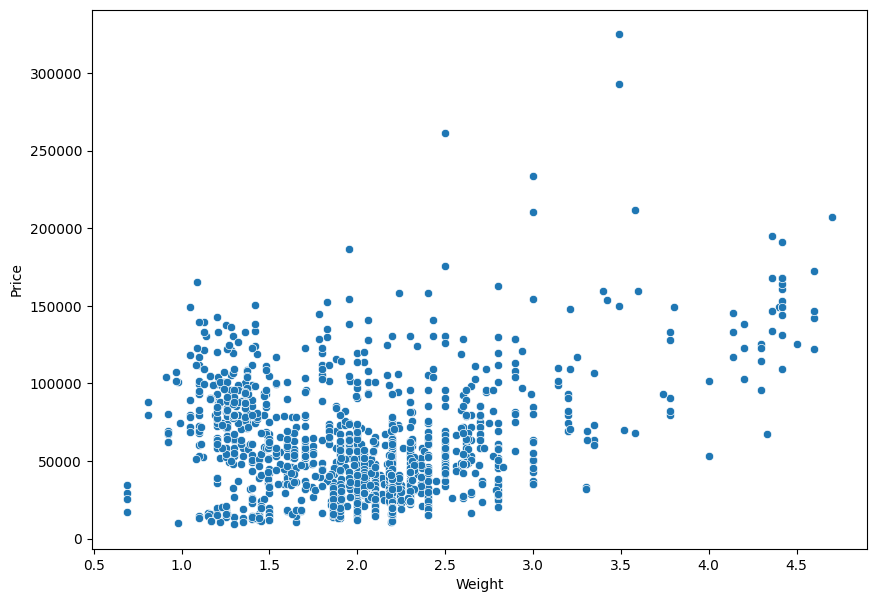

In [238]:
#lets see if price and weight has any information for us
plt.figure(figsize=(10,7))
sns.scatterplot(x= df['Weight'],y = df['Price'])
plt.show()

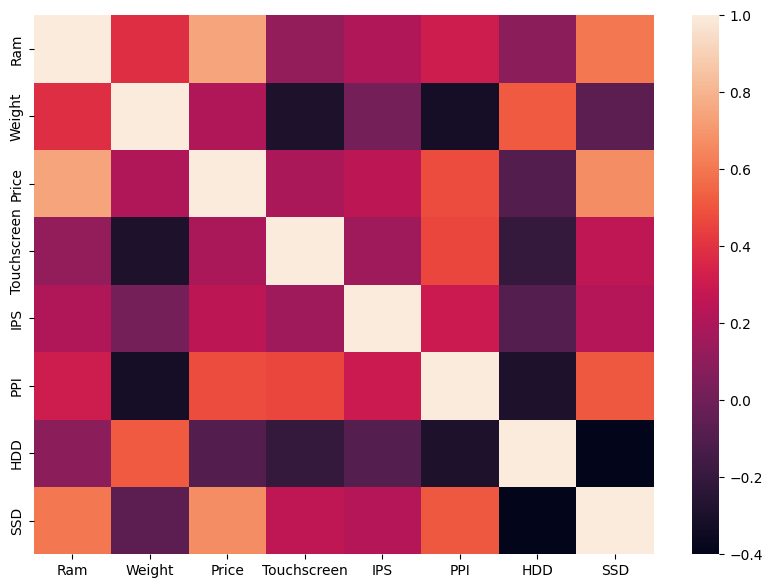

In [240]:
#lets check correlation using heatmap this time
plt.figure(figsize=(10,7))
sns.heatmap(df[['Ram','Weight','Price','Touchscreen','IPS','PPI','HDD','SSD']].corr())
plt.show()

<Figure size 1000x700 with 0 Axes>

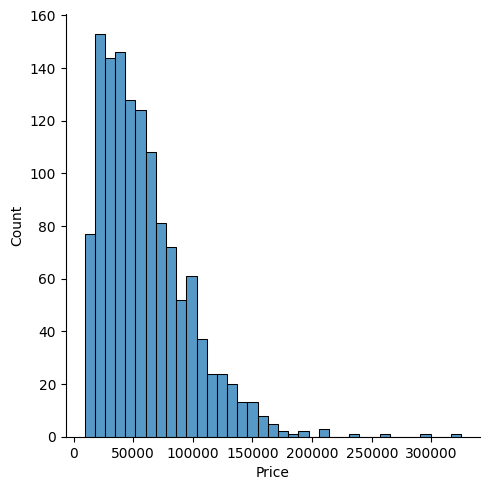

In [242]:
#lets see prices count again
plt.figure(figsize=(10,7))
sns.displot(df['Price'])
plt.show()

<Figure size 1000x700 with 0 Axes>

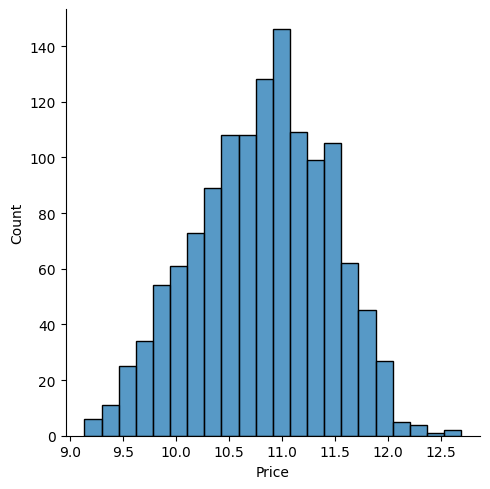

In [244]:
#lets see if we can have a look at logrithmic view of prices because prices seems skewed
plt.figure(figsize=(10,7))
sns.displot(np.log(df['Price']))
plt.show()

In [254]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,Processor brand,HDD,SSD,Gpu Brand,OS
0,Apple,Ultrabook,8,1.37,71379,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47896,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96096,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


**Data Pre Processing**

In [259]:
#so now we see, there is still catagorial features that we have to transform
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [260]:
#lets separate out catagorial features
#lets separate x and y attributes
x = df.drop(columns=['Price'])
y = np.log(df['Price'])
categorical_columns = ['Company', 'TypeName', 'Processor brand', 'Gpu Brand', 'OS']

In [263]:
# i will now create a column transformer for one-hot encoding
transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), categorical_columns)
    ],
    remainder='passthrough'
)

In [267]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,Processor brand,HDD,SSD,Gpu Brand,OS
0,Apple,Ultrabook,8,1.37,71379,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47896,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96096,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


**Model Creation**

In [265]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor

In [269]:
#I am going with RandomForest Regressor
model = RandomForestRegressor(n_estimators=300,
                              random_state=1,
                              max_samples=0.8,
                              max_features=0.75,
                              max_depth=20)

In [272]:
#i am creating pipeline so that we first transform our data that we defined catagorial
pipeline = Pipeline([
    ('transformer', transformer),
    ('model', model)
])

In [273]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=1)
pipeline.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Company', 'TypeName',
                                                   'Processor brand',
                                                   'Gpu Brand', 'OS'])])),
                ('model',
                 RandomForestRegressor(max_depth=20, max_features=0.75,
                                       max_samples=0.8, n_estimators=300,
                                       random_state=1))])

In [274]:
#now that our model is trained lets try to predict
y_pred = pipeline.predict(x_test)

In [275]:
#lets evaluate R square score and mean absolute error
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.882810093301196
MAE: 0.15939930997548404


So here i conclude that getting 0.88 as R2 score suggests that model is performing well with only 15% of variation in price. So therefore lower MAE (i-e 0.15), i will say model predictions are almost close to actual value

In [284]:
#lets see if we can predit some value
def price_predictor(company,
                    typename,
                    ram,
                    weight,
                    touchscreen,
                    ips,
                    screensize,
                    screen_res,
                    cpu_brand,
                    hdd, ssd,
                    gpu_brand,
                    os):
    X_res = int(screen_res.split('x')[0])
    Y_res = int(screen_res.split('x')[1])
    ppi = ((X_res**2)+(Y_res**2))**0.5/screensize

    array = np.array([company, typename, ram, weight, touchscreen, ips, ppi, cpu_brand, hdd, ssd, gpu_brand, os])

    columns = ['Company','TypeName','Ram',	'Weight'	,'Touchscreen'	,'IPS'	,'PPI'	,'Processor brand',	'HDD',	'SSD',	'Gpu Brand',	'OS']
    query = pd.DataFrame(array.reshape(1, 12), columns=columns)

    prediction = np.exp(pipeline.predict(query)[0])

    return round(prediction)

In [291]:
company = 'Dell'
typename = 'Ultrabook'
ram = 24
weight = 1.37
touchscreen = 0
ips = 0
screensize = 13.3
screen_res = '1920x1080'
cpu_brand = 'Intel Core i5'
hdd = 256
ssd = 128
gpu_brand = 'Intel'
os = 'Windows'

predicted_price = price_predictor(company, typename, ram, weight, touchscreen, ips, screensize, screen_res, cpu_brand, hdd, ssd, gpu_brand, os)

print(f"Predicted Price: {predicted_price}")

Predicted Price: 90999
